<a href="https://colab.research.google.com/github/lakmg2007/SCALAR_LEARNINGS/blob/main/Movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

try:
  from google.colab import drive
  print("Running in google colab env")
except:
  print("Running in local env")

Running in google colab env


In [5]:
try:
  movies_df = pd.read_csv("/content/movies.csv")
  print("Moves data loaded successfully")

  ratings_df_raw = pd.read_json("/content/ratings.json", lines=True)
  print("Raw ratings data loaded successfully")

  ratings_list = []
  for _, row in ratings_df_raw.iterrows():
    user_id = row['_id']
    if 'rated' in row and isinstance(row['rated'], dict):
      for movie_id, rating_value in row['rated'].items():
        if movie_id != 'submit' and isinstance(rating_value,list) and len(rating_value) > 0:
          try:
            rating = float(rating_value[0])
            if rating == -1:
              rating = 1
            elif rating ==0:
              rating = 3
            elif rating == 1:
              rating = 5
            ratings_list.append({'userId': user_id,
                                 'movieId': movie_id,
                                 'rating': rating})
          except:
            pass

    ratings_df = pd.DataFrame(ratings_list)
    print("Ratings data transformed successfully")

    user_df = pd.read_csv("/content/users.csv")
    print("User data loaded successfully")

except FileNotFoundError:
    print("❌ Error: Please upload the data files to Colab or update the file paths")
    print("Required files: movies.csv, ratings.json, users.csv")


Moves data loaded successfully
Raw ratings data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data loaded successfully
Ratings data transformed successfully
User data 

# **Data Exploration**

In [6]:
print("MOVIES DATASET")
print("="*50)
print(f"Shape: {movies_df.shape}")
print(f"\nColumns: {list(movies_df.columns)}")
print(f"\nFirst 3 movies:")
movies_df.head(3)

MOVIES DATASET
Shape: (2850, 10)

Columns: ['movie_id', 'description', 'language', 'released', 'rating', 'writer', 'director', 'cast', 'genre', 'name']

First 3 movies:


,movie_id,description,language,released,rating,writer,director,cast,genre,name
0,tt5286444,"Neerja is the story of the courageous Neerja Bhanot, who sacrificed her life while protecting th...","[ ""Hindi"" ]",2016-02-19T00:00:00.000Z,7.9,"[ ""Saiwyn Quadras"", ""Sanyukta Shaikh Chawla"" ]","[ ""Ram Madhvani"" ]","[ ""Sonam Kapoor"", ""Shabana Azmi"", ""Yogendra Tikku"", ""Abrar Zahoor"", ""Jim Sarbh"", ""Ali Baldiwala""...","[ ""Biography"", ""Drama"", ""Thriller"" ]",Neerja
1,tt4434004,A story that revolves around drug abuse in the affluent north Indian State of Punjab and how the...,"[ ""Hindi"", ""Panjabi"" ]",2016-06-17T00:00:00.000Z,7.9,"[ ""Sudip Sharma"", ""Abhishek Chaubey"" ]","[ ""Abhishek Chaubey"" ]","[ ""Alia Bhatt"", ""Shahid Kapoor"", ""Diljit Dosanjh"", ""Kareena Kapoor"", ""Taran Bajaj"", ""Mansi Jhing...","[ ""Crime"", ""Drama"", ""Thriller"" ]",Udta Punjab
2,tt0248126,"Yashvardhan Raichand lives a very wealthy lifestyle along with his wife, Nandini, and two sons, ...","[ ""Hindi"", ""English"", ""Urdu"" ]",2001-12-14T00:00:00.000Z,7.5,"[ ""Karan Johar"", ""Sheena Parikh"" ]","[ ""Karan Johar"" ]","[ ""Amitabh Bachchan"", ""Jaya Bhaduri"", ""Shah Rukh Khan"", ""Kajol"", ""Hrithik Roshan"", ""Kareena Kapo...","[ ""Drama"", ""Musical"", ""Romance"" ]",Kabhi Khushi Kabhie Gham...


In [7]:
print("Ratings DataSets")
print("="*50)
print(f"Shape: {ratings_df.shape}")
print(f"\n Columns: {list(ratings_df.columns)}")
print("\nRating statistics:")
print(ratings_df['rating'].describe())
print("\nFirst 5 ratings")
ratings_df.head()

Ratings DataSets
Shape: (20652, 3)

 Columns: ['userId', 'movieId', 'rating']

Rating statistics:
count    20652.000000
mean         3.553845
std          1.290447
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

First 5 ratings


,userId,movieId,rating
0,11megha89,tt0104561,5
1,11megha89,tt0323013,5
2,11megha89,tt2213054,3
3,11megha89,tt1447508,3
4,11megha89,tt4505006,3


In [10]:
print("USER DATASET")
print("="*50)
print(f"Shape: {user_df.shape}")
print(f"\n Columns: {list(user_df.columns)}")
print(f"\nUser demograhics:")
if 'job' in user_df.columns:
  print("\nJob distribution:")
  print(user_df['job'].value_counts().head())
if 'state' in user_df.columns:
  print("\nState distribution:")
  print(user_df['state'].value_counts().head())
user_df.head()

USER DATASET
Shape: (924, 6)

 Columns: ['_id', 'languages', 'job', 'state', 'dob', 'gender']

User demograhics:

Job distribution:
job
Student          575
Service          198
Self-employed     74
Others            65
Retired           11
Name: count, dtype: int64

State distribution:
state
Delhi             637
Andhra Pradesh     65
Uttar Pradesh      63
Haryana            30
Maharashtra        23
Name: count, dtype: int64


,_id,languages,job,state,dob,gender
0,11megha89,"[ ""Hindi"" ]",Student,Haryana,18-04-1989,Female
1,2ez4nimzi,"[ ""Hindi"" ]",Student,Delhi,16-06-2000,Male
2,9953547227,"[ ""Hindi"" ]",Student,Delhi,06-09-1998,Male
3,9958221803,"[ ""Hindi"" ]",Student,Delhi,09-09-1996,Male
4,ABCDEFGHI JKLM,"[ ""Hindi"" ]",Service,Delhi,26-01-1960,Male


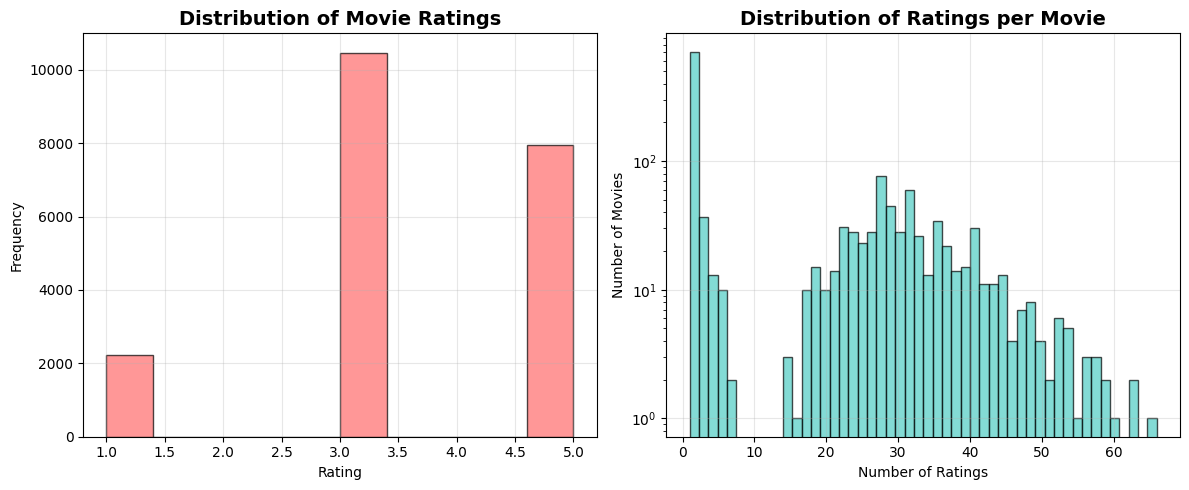

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ratings_df['rating'].hist(bins=10,edgecolor='black', alpha=0.7,color='#FF6B6B')
plt.title('Distribution of Movie Ratings', fontsize=14,fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Plot 2: Number of ratings per movie
plt.subplot(1, 2, 2)
ratings_per_movie = ratings_df.groupby('movieId').size()
plt.hist(ratings_per_movie, bins=50, edgecolor='black', alpha=0.7, color='#4ECDC4')
plt.title('Distribution of Ratings per Movie', fontsize=14, fontweight='bold')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
print("Available movie features:")
for col in movies_df.columns:
  print(f"- {col}: {movies_df[col].dtype}")
  if movies_df[col].dtype == 'object' and col != 'movie_id':
       print(f"  Sample: {str(movies_df[col].iloc[0])[:100]}...")
  print()

Available movie features:
- movie_id: object

- description: object
  Sample: Neerja is the story of the courageous Neerja Bhanot, who sacrificed her life while protecting the li...

- language: object
  Sample: [ "Hindi" ]...

- released: object
  Sample: 2016-02-19T00:00:00.000Z...

- rating: float64

- writer: object
  Sample: [ "Saiwyn Quadras", "Sanyukta Shaikh Chawla" ]...

- director: object
  Sample: [ "Ram Madhvani" ]...

- cast: object
  Sample: [ "Sonam Kapoor", "Shabana Azmi", "Yogendra Tikku", "Abrar Zahoor", "Jim Sarbh", "Ali Baldiwala", "V...

- genre: object
  Sample: [ "Biography", "Drama", "Thriller" ]...

- name: object
  Sample: Neerja...



In [14]:
movies_df = movies_df.fillna('')
movies_df['movieId'] = movies_df['movie_id']

def clean_list_string(s):
  if isinstance(s,str):
     s = s.replace('[','').replace(']', '').replace('"', '').replace("'", '')
     return s.strip()
  return str(s)

# Create a feature string combining available text features
movies_df['combined_features'] = ''

# Add movie name
if 'name' in movies_df.columns:
    movies_df['combined_features'] += movies_df['name'].astype(str) + ' '

# Add genre
if 'genre' in movies_df.columns:
    movies_df['combined_features'] += movies_df['genre'].apply(clean_list_string) + ' '

# Add cast
if 'cast' in movies_df.columns:
    movies_df['combined_features'] += movies_df['cast'].apply(clean_list_string) + ' '

# Add director
if 'director' in movies_df.columns:
    movies_df['combined_features'] += movies_df['director'].apply(clean_list_string) + ' '

# Add description
if 'description' in movies_df.columns:
    movies_df['combined_features'] += movies_df['description'].astype(str)

# Clean up the combined features
movies_df['combined_features'] = movies_df['combined_features'].str.strip()

print("Sample combined features:")
for i in range(min(3, len(movies_df))):
    print(f"\nMovie {i+1}: {movies_df['name'].iloc[i]}")
    print(f"Features: {movies_df['combined_features'].iloc[i][:200]}...")

Sample combined features:

Movie 1: Neerja
Features: Neerja Biography, Drama, Thriller Sonam Kapoor, Shabana Azmi, Yogendra Tikku, Abrar Zahoor, Jim Sarbh, Ali Baldiwala, Vikrant Singta, Kirti Adarkar, Parth Akerkar, Hayder Ali, Arjun Aneja, Bobby Arora...

Movie 2: Udta Punjab
Features: Udta Punjab Crime, Drama, Thriller Alia Bhatt, Shahid Kapoor, Diljit Dosanjh, Kareena Kapoor, Taran Bajaj, Mansi Jhingran, Satish Kaushik, Suhail Nayyar, Rajesh Kumar Sharma, Harpreet Singh, Prabhjyot...

Movie 3: Kabhi Khushi Kabhie Gham...
Features: Kabhi Khushi Kabhie Gham... Drama, Musical, Romance Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan, Kajol, Hrithik Roshan, Kareena Kapoor, Rani Mukerji, Farida Jalal, Alok Nath, Johnny Lever, Himani S...


In [15]:
print("Creating TF-IDF matrix for content-based filtering...")

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',


)

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(movies_df['combined_features'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Number of movies: {tfidf_matrix.shape[0]}")
print(f"Number of features: {tfidf_matrix.shape[1]}")

Creating TF-IDF matrix for content-based filtering...
TF-IDF matrix shape: (2850, 19392)
Number of movies: 2850
Number of features: 19392


In [16]:
print("📐 Calculating cosine similarity between movies...")

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(f"Similarity matrix shape: {cosine_sim.shape}")
print(f"\nSample similarities for first movie:")
print(f"Min similarity: {cosine_sim[0].min():.3f}")
print(f"Max similarity: {cosine_sim[0].max():.3f}")
print(f"Mean similarity: {cosine_sim[0].mean():.3f}")

📐 Calculating cosine similarity between movies...
Similarity matrix shape: (2850, 2850)

Sample similarities for first movie:
Min similarity: 0.000
Max similarity: 1.000
Mean similarity: 0.006


In [17]:
def get_content_based_recommendations(movie_title, movie_df, cosine_sim, n_recommendations=10):
  try:
    idx = movies_df[movies_df['name'].str.contains(movie_title, case=False)].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:n_recommendations+1]]

    recommendations = movies_df.iloc[movie_indices][['movieId','name','genre']].copy()
    recommendations['similarity_score'] = [score[1] for score in sim_scores[1:n_recommendations+1]]
    return recommendations
  except IndexError:
    print(f"❌ Movie '{movie_title}' not found in database")
    return pd.DataFrame()

In [18]:
print("CONTENT-BASED RECOMMENDATIONS DEMO")
print("="*50)
test_movie = movies_df['name'].iloc[0]
print(f"\n Finding movies similar to '{test_movie}")
recommendations = get_content_based_recommendations(test_movie, movies_df, cosine_sim)
print("\n Top 10 Recommendations")
recommendations

CONTENT-BASED RECOMMENDATIONS DEMO

 Finding movies similar to 'Neerja

 Top 10 Recommendations


,movieId,name,genre,similarity_score
96,tt5805252,Budhia Singh: Born to Run,"[ ""Biography"", ""Drama"", ""Sport"" ]",0.079517
107,tt0347332,Khakee,"[ ""Action"", ""Adventure"", ""Drama"" ]",0.059487
1957,tt3954068,Enakkul Oru Devathai,"[ ""Family"" ]",0.057065
391,tt0077783,Junoon,"[ ""Drama"" ]",0.056980
324,tt5513098,Autohead,"[ ""Crime"", ""Drama"" ]",0.056034
494,tt0293589,Shaheed,"[ ""Biography"", ""Drama"", ""History"" ]",0.055881
1270,tt1608777,"LSD: Love, Sex Aur Dhokha","[ ""Comedy"", ""Crime"", ""Drama"" ]",0.054789
629,tt1961143,...EBONG KANNA,"[ ""Drama"", ""Western"" ]",0.050782
583,tt0350005,Pyaar Ki Jeet,"[ ""Comedy"", ""Drama"", ""Musical"" ]",0.050742
2625,tt2358592,Lucia,"[ ""Drama"", ""Romance"", ""Sci-Fi"" ]",0.049544


# **User-User Collaborative Filtering**
# **User-User collaborative filtering finds users with similar preferences and recommends movies they liked.**

# **How it works:**
# **Find users with similar rating patterns**
# **Identify movies they rated highly that target user hasn't seen**
# **Recommend those movies**